## 3.基于VARMA回归模型的股票价格预测

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.set_option('display.max_rows', 10)

import warnings
warnings.filterwarnings("ignore")

In [25]:
data=pd.read_csv('./data/data_stock2.csv',encoding='gbk')

data.index = data.myTime

data_all = data.loc["1960-07-01":"1977-10-01", ['lnDate1', 'lnDate2', 'lnDate3']]
print("======所有数据形状======")
print(data_all.shape)

data_train = data_all[0:60]
print("======样本数据形状======")
print(data_train.shape)

data_train

======所有数据形状======
(70, 3)
======样本数据形状======
(60, 3)


,lnDate1,lnDate2,lnDate3
myTime,,,
1960-07-01,0.045445,1.000000,0.823981
1960-10-01,0.111786,0.972014,0.832954
1961-01-01,0.074238,0.993996,0.843496
1961-04-01,0.000000,0.972568,0.788654
1961-07-01,0.026239,0.973104,0.793481
...,...,...,...
1974-04-01,0.368654,0.126045,0.000000
1974-07-01,0.457297,0.124603,0.065994
1974-10-01,0.519171,0.183588,0.153300


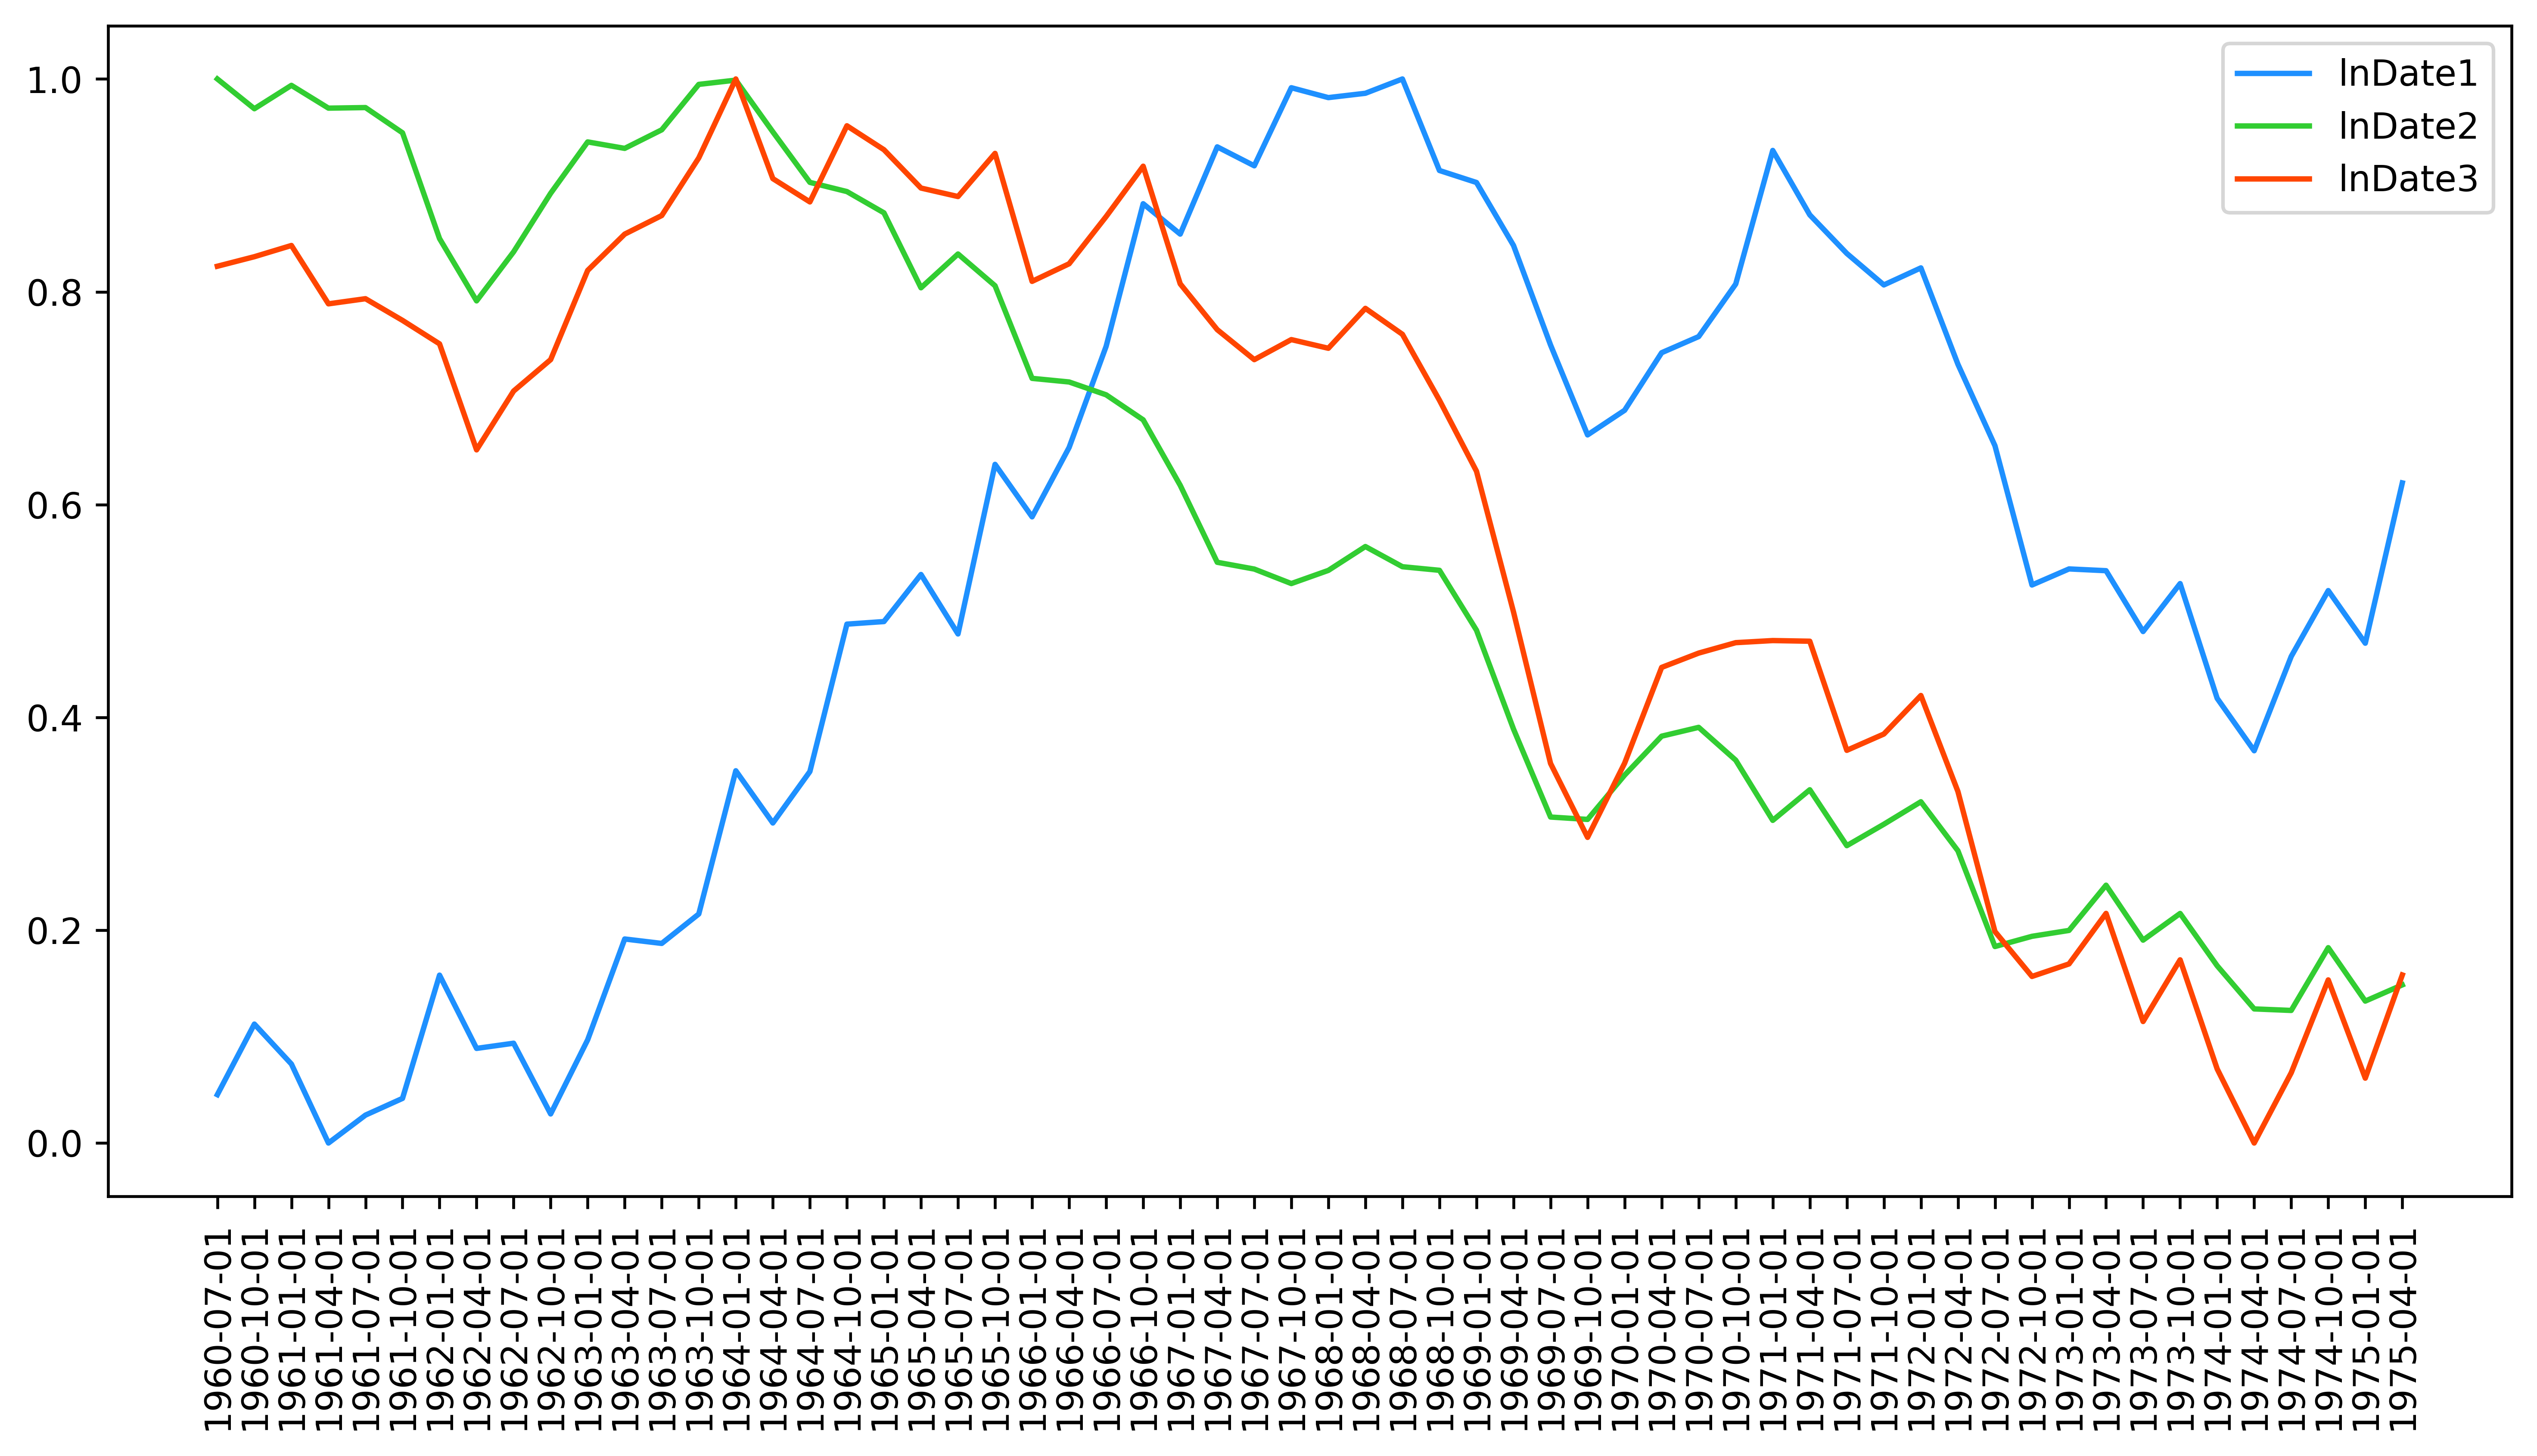

In [26]:
plt.figure(figsize=(12,6),dpi=600)
plt.xticks(rotation=90)
plt.plot(data_train['lnDate1'],'dodgerblue',label='lnDate1')
plt.plot(data_train['lnDate2'],'limegreen',label='lnDate2')
plt.plot(data_train['lnDate3'],'orangered',label='lnDate3')
plt.legend()
plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller 
adf_result1 = adfuller(data_train['lnDate1'])
adf_result2 = adfuller(data_train['lnDate2'])
adf_result3 = adfuller(data_train['lnDate3'])
print(adf_result1[1],adf_result2[1],adf_result3[1])

0.19341638466350114 0.8806961283442936 0.9147461773812955


In [28]:
data_train_diff=data_train.diff(1)
data_train_diff=data_train_diff.dropna()
data_train_diff

,lnDate1,lnDate2,lnDate3
myTime,,,
1960-10-01,0.066342,-0.027986,0.008973
1961-01-01,-0.037548,0.021982,0.010542
1961-04-01,-0.074238,-0.021428,-0.054842
1961-07-01,0.026239,0.000535,0.004826
1961-10-01,0.015705,-0.023720,-0.020377
...,...,...,...
1974-04-01,-0.049278,-0.040556,-0.069696
1974-07-01,0.088643,-0.001442,0.065994
1974-10-01,0.061874,0.058986,0.087306


In [29]:
adf_result1 = adfuller(data_train_diff['lnDate1'])
adf_result2 = adfuller(data_train_diff['lnDate2'])
adf_result3 = adfuller(data_train_diff['lnDate3'])
print(adf_result1[1],adf_result2[1],adf_result3[1])

0.13617139745626772 4.0613672589027086e-08 4.67935863203642e-09


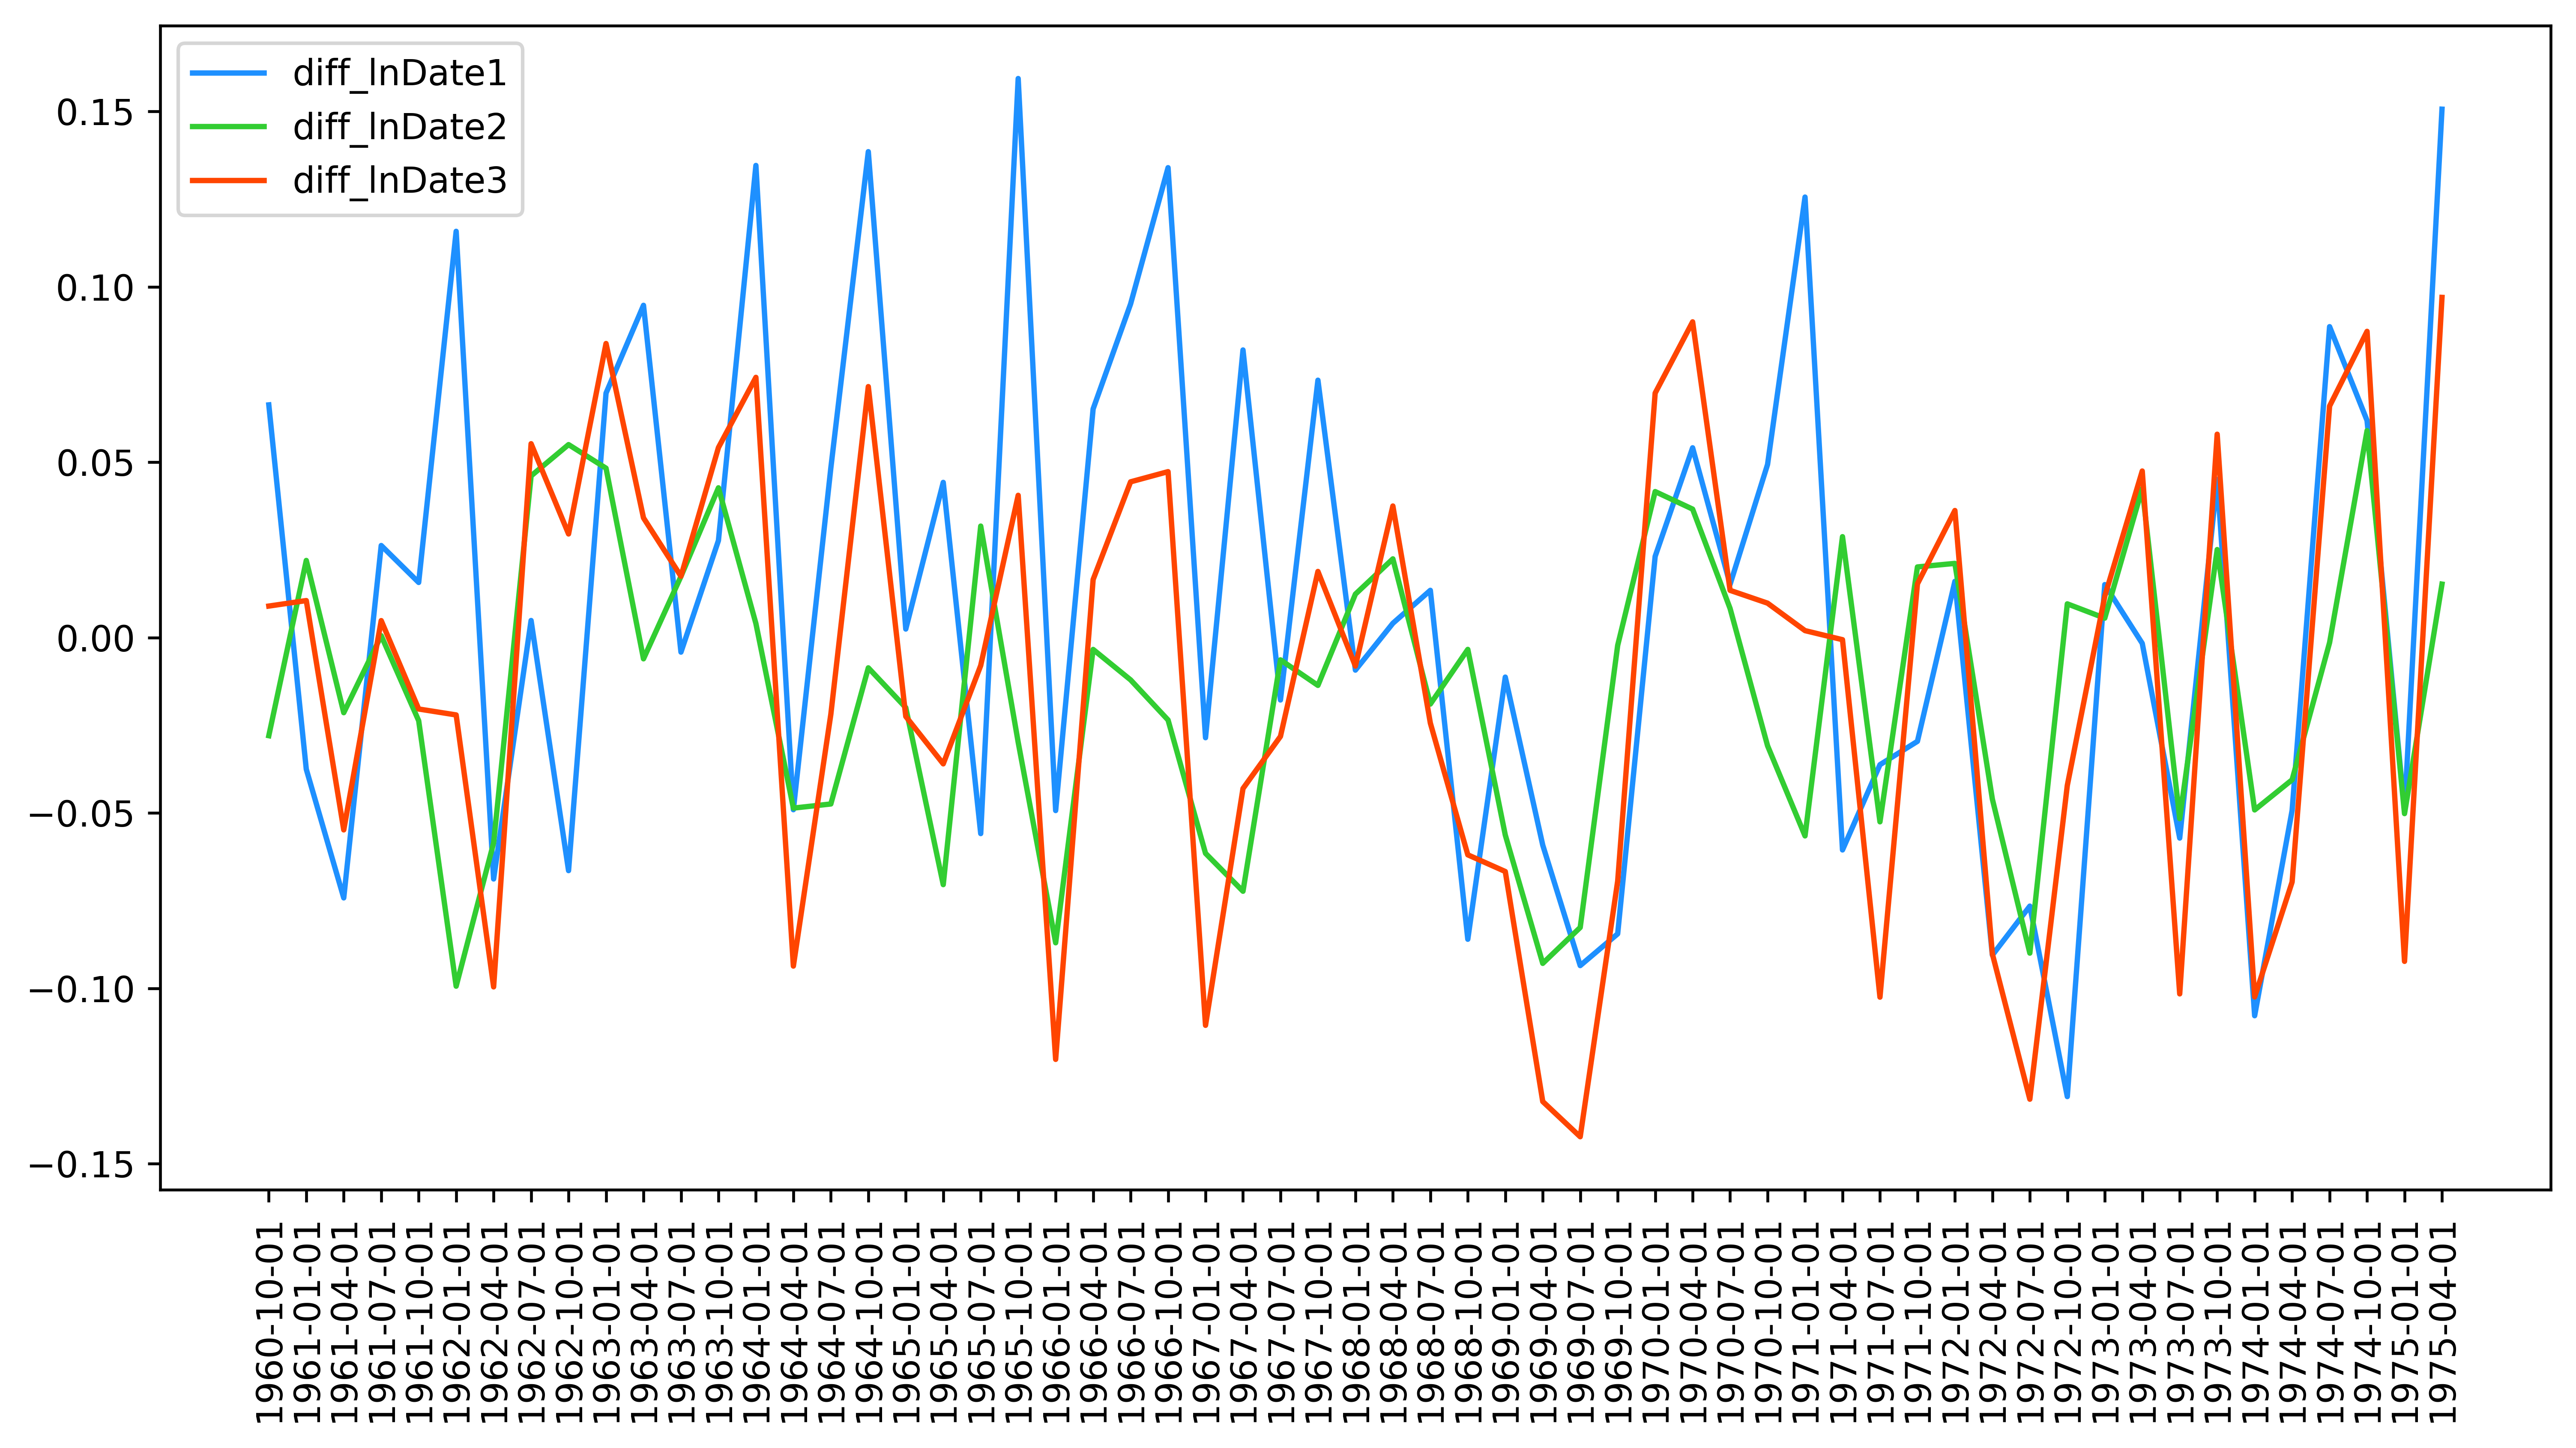

In [30]:
plt.figure(figsize=(12,6),dpi=600)
plt.xticks(rotation=90)
plt.plot(data_train_diff['lnDate1'],'dodgerblue',label='diff_lnDate1')
plt.plot(data_train_diff['lnDate2'],'limegreen',label='diff_lnDate2')
plt.plot(data_train_diff['lnDate3'],'orangered',label='diff_lnDate3')
plt.legend()
plt.show()

In [31]:
model_1 = sm.tsa.VARMAX(data_train_diff, order=(4,5))
res_1 = model_1.fit(maxiter=1000)
print(res_1.summary())

                                   Statespace Model Results                                  
Dep. Variable:     ['lnDate1', 'lnDate2', 'lnDate3']   No. Observations:                   59
Model:                                    VARMA(4,5)   Log Likelihood                 388.648
                                         + intercept   AIC                           -597.296
Date:                               Sat, 12 Sep 2020   BIC                           -410.318
Time:                                       09:28:30   HQIC                          -524.307
Sample:                                   10-01-1960                                         
                                        - 04-01-1975                                         
Covariance Type:                                 opg                                         
Ljung-Box (Q):          29.53, 21.82, 22.21   Jarque-Bera (JB):     1.07, 0.02, 0.75
Prob(Q):                   0.89, 0.99, 0.99   Prob(JB):             0

In [32]:
pred_1 = res_1.forecast(steps=10)
pred_1

,lnDate1,lnDate2,lnDate3
1975-07-01,0.046652,0.040322,0.058248
1975-10-01,0.051499,-0.086155,-0.068935
1976-01-01,-0.022336,-0.066200,-0.081562
1976-04-01,0.028352,0.014351,0.024358
1976-07-01,-0.014470,-0.028985,-0.042050
1976-10-01,0.005051,-0.020341,-0.022171
1977-01-01,0.000132,0.002857,-0.001414
1977-04-01,0.017049,-0.024555,-0.016331
1977-07-01,-0.005082,-0.023971,-0.029103
1977-10-01,0.003823,-0.015003,-0.015721


In [33]:
pred_1_real=pd.DataFrame(np.zeros((11,3)),columns= ['lnDate1', 'lnDate2', 'lnDate3']) 
pred_1_real.index=pd.date_range('1975/04/1', periods=11, freq='3MS')
pred_1_real.iloc[0,:]=data_all.iloc[59,0:3]
pred_1_real

,lnDate1,lnDate2,lnDate3
1975-04-01,0.620375,0.148617,0.157956
1975-07-01,0.000000,0.000000,0.000000
1975-10-01,0.000000,0.000000,0.000000
1976-01-01,0.000000,0.000000,0.000000
1976-04-01,0.000000,0.000000,0.000000
...,...,...,...
1976-10-01,0.000000,0.000000,0.000000
1977-01-01,0.000000,0.000000,0.000000
1977-04-01,0.000000,0.000000,0.000000
1977-07-01,0.000000,0.000000,0.000000


In [34]:
for i in range(len(pred_1)):
    pred_1_real.iloc[i+1,0]= pred_1_real.iloc[i,0]+pred_1.iloc[i,0]
    pred_1_real.iloc[i+1,1]= pred_1_real.iloc[i,1]+pred_1.iloc[i,1]
    pred_1_real.iloc[i+1,2]= pred_1_real.iloc[i,2]+pred_1.iloc[i,2]
    
pred_1_real

,lnDate1,lnDate2,lnDate3
1975-04-01,0.620375,0.148617,0.157956
1975-07-01,0.667027,0.188939,0.216204
1975-10-01,0.718527,0.102784,0.147269
1976-01-01,0.696191,0.036583,0.065707
1976-04-01,0.724543,0.050934,0.090065
...,...,...,...
1976-10-01,0.715123,0.001608,0.025844
1977-01-01,0.715256,0.004465,0.024430
1977-04-01,0.732304,-0.020091,0.008099
1977-07-01,0.727222,-0.044061,-0.021004


In [35]:
data_all.index=pd.date_range('1960/7/1', periods=70, freq='3MS')

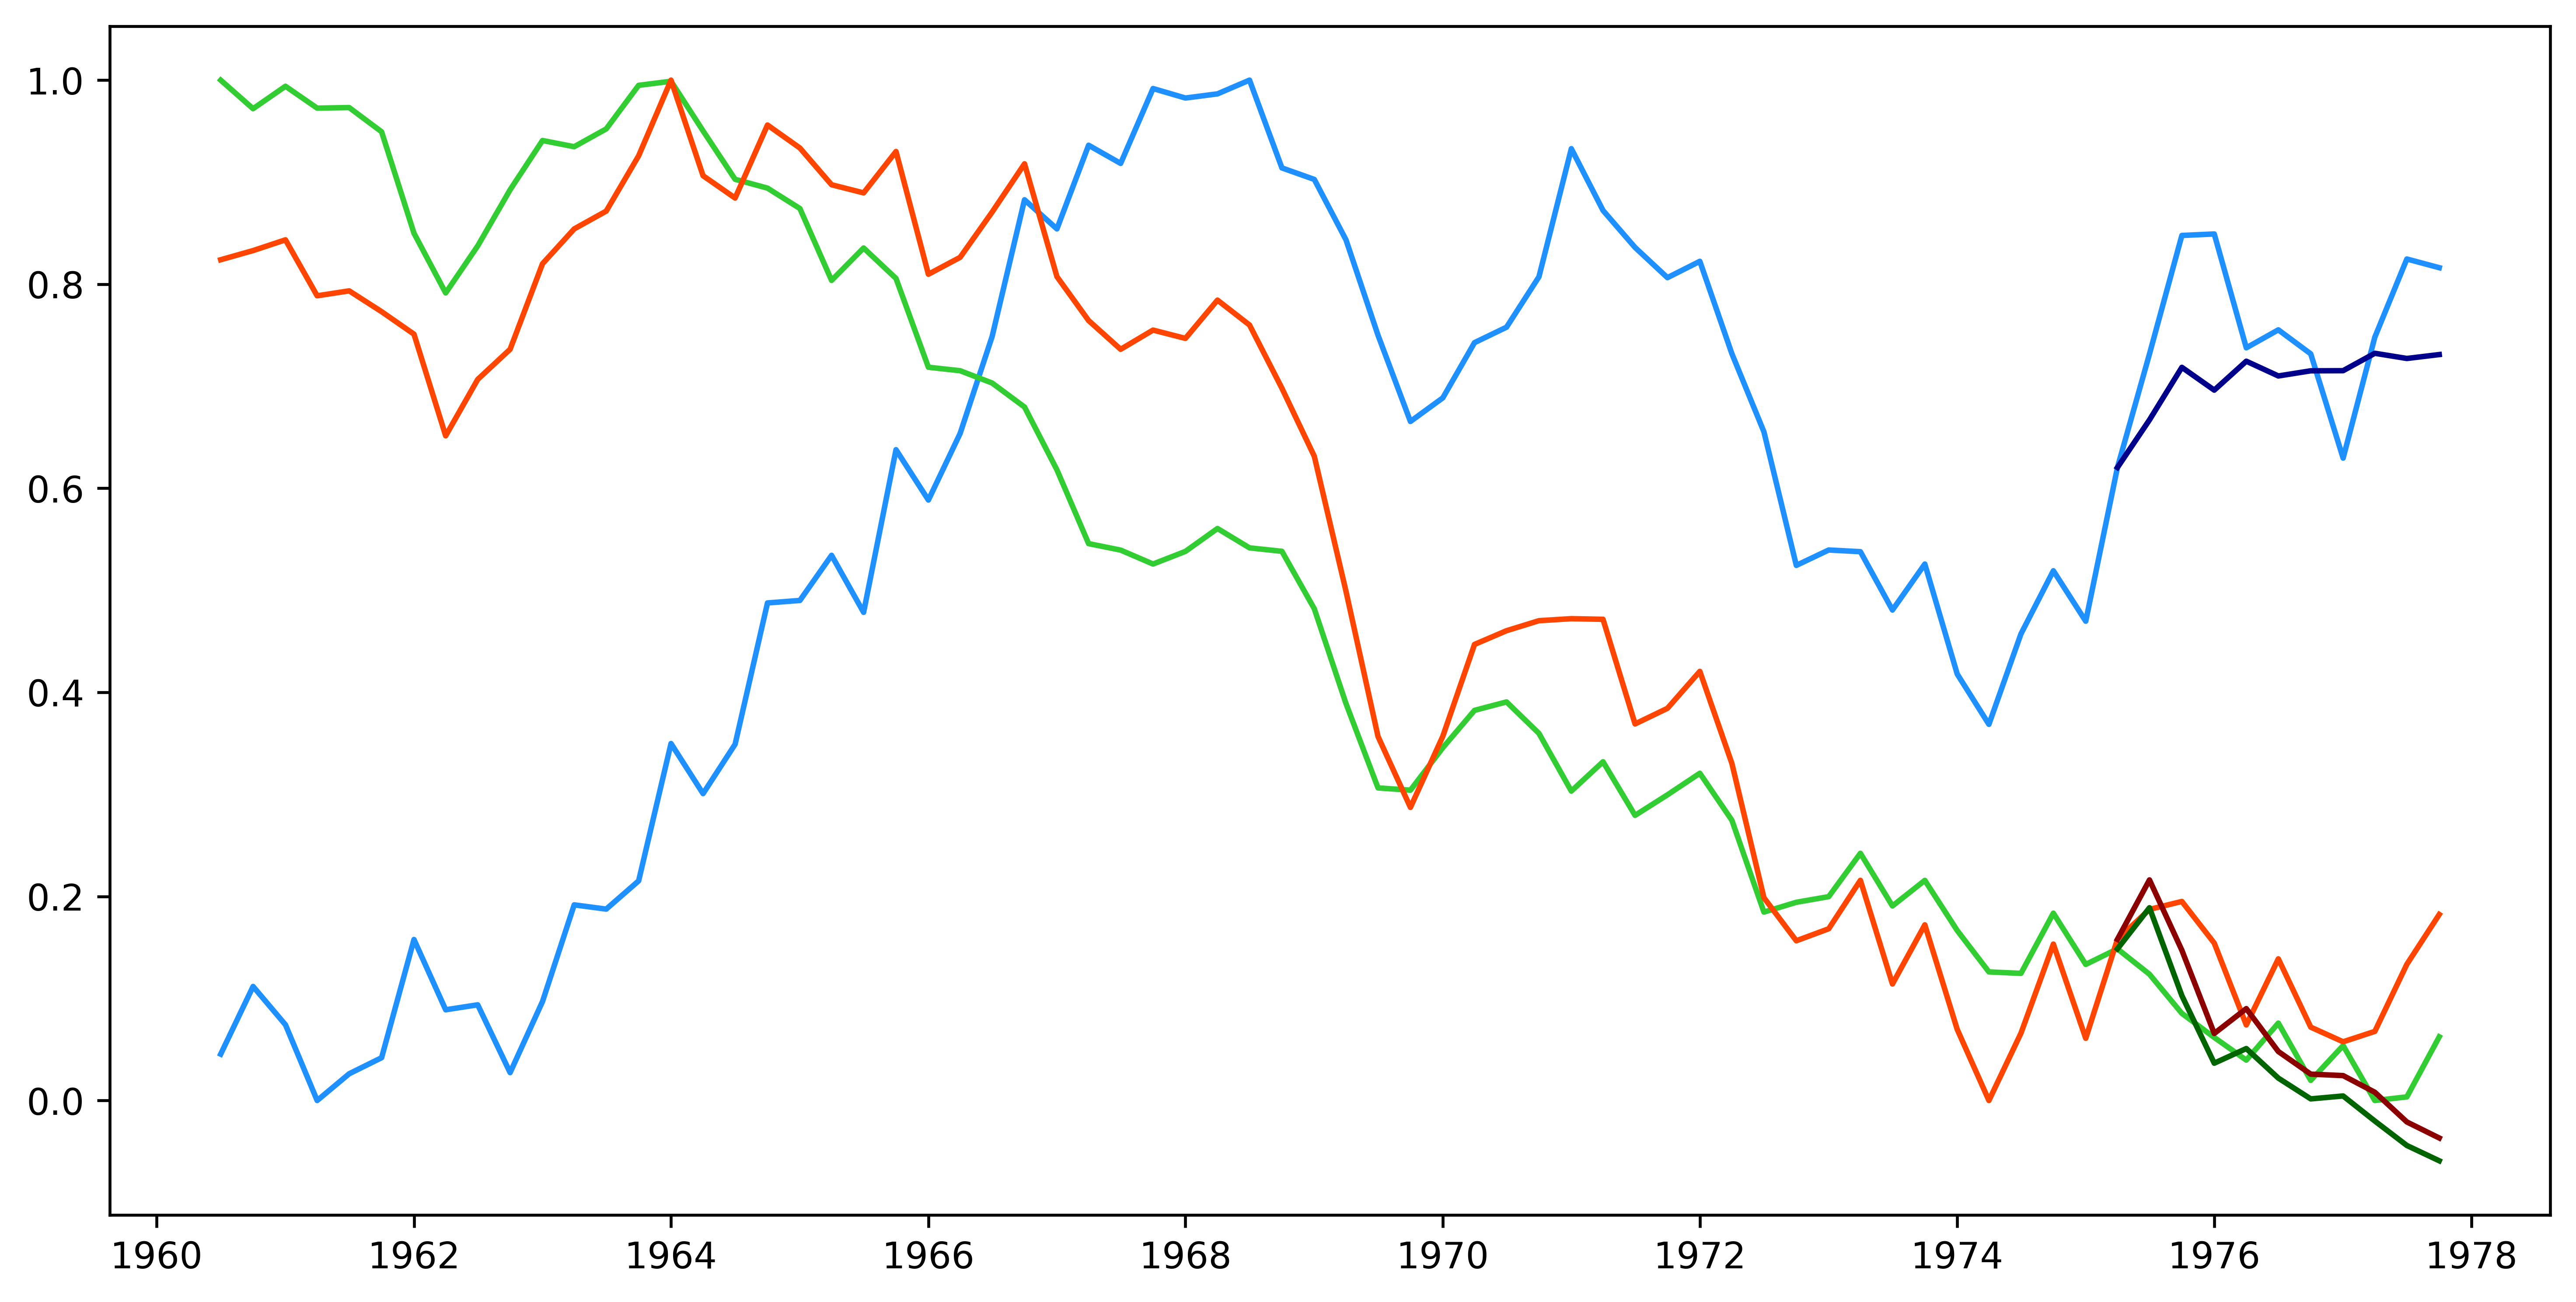

In [36]:
plt.figure(figsize=(12,6),dpi=600)
plt.plot(data_all['lnDate1'],'dodgerblue',data_all['lnDate2'],'limegreen',data_all['lnDate3'],'orangered')
plt.plot(pred_1_real['lnDate1'],'darkblue',pred_1_real['lnDate2'],'darkgreen',pred_1_real['lnDate3'],'darkred')
plt.show()

In [37]:
data_actual=data_all.tail(11)
data_actual

,lnDate1,lnDate2,lnDate3
1975-04-01,0.620375,0.148617,0.157956
1975-07-01,0.731584,0.123763,0.187303
1975-10-01,0.847766,0.085390,0.195090
1976-01-01,0.849229,0.061798,0.154247
1976-04-01,0.737663,0.039590,0.074057
...,...,...,...
1976-10-01,0.731735,0.019728,0.071891
1977-01-01,0.629549,0.053850,0.057567
1977-04-01,0.748059,0.000000,0.067738
1977-07-01,0.824693,0.003567,0.133505


In [38]:
error_1=pow(data_actual['lnDate1']-pred_1_real['lnDate1'],2)
MSE1=error_1.sum()/len(pred_1_real['lnDate1'])
error_2=pow(data_actual['lnDate2']-pred_1_real['lnDate2'],2)
MSE2=error_2.sum()/len(pred_1_real['lnDate2'])
error_3=pow(data_actual['lnDate3']-pred_1_real['lnDate3'],2)
MSE3=error_3.sum()/len(pred_1_real['lnDate3'])
print(MSE1,MSE2,MSE3)

0.006465999199735198 0.0025837386450005655 0.008918677130687972


In [39]:
model_2 = sm.tsa.VARMAX(data_train_diff, order=(4,4))
res_2 = model_2.fit(maxiter=1000)
print(res_2.summary())

                                   Statespace Model Results                                  
Dep. Variable:     ['lnDate1', 'lnDate2', 'lnDate3']   No. Observations:                   59
Model:                                    VARMA(4,4)   Log Likelihood                 381.738
                                         + intercept   AIC                           -601.476
Date:                               Sat, 12 Sep 2020   BIC                           -433.196
Time:                                       09:29:39   HQIC                          -535.786
Sample:                                   10-01-1960                                         
                                        - 04-01-1975                                         
Covariance Type:                                 opg                                         
Ljung-Box (Q):          26.54, 27.38, 26.27   Jarque-Bera (JB):     1.72, 0.40, 0.02
Prob(Q):                   0.95, 0.94, 0.95   Prob(JB):             0

In [40]:
pred_2 = res_2.forecast(steps=10)
pred_2

,lnDate1,lnDate2,lnDate3
1975-07-01,0.030405,0.039323,0.047643
1975-10-01,0.086959,-0.058078,-0.015625
1976-01-01,-0.015609,-0.046522,-0.066466
1976-04-01,0.043354,-0.006134,0.011879
1976-07-01,0.014424,-0.026800,-0.023821
1976-10-01,0.009330,-0.013631,-0.014923
1977-01-01,0.006745,-0.015335,-0.016497
1977-04-01,0.014082,-0.021548,-0.017012
1977-07-01,0.002058,-0.016460,-0.018434
1977-10-01,0.006168,-0.019846,-0.019472


In [41]:
pred_2_real=pd.DataFrame(np.zeros((11,3)),columns= ['lnDate1', 'lnDate2', 'lnDate3']) 
pred_2_real.index=pd.date_range('1975/04/1', periods=11, freq='3MS')
pred_2_real.iloc[0,:]=data_all.iloc[59,0:3]
for i in range(len(pred_2)):
    pred_2_real.iloc[i+1,0]= pred_2_real.iloc[i,0]+pred_2.iloc[i,0]
    pred_2_real.iloc[i+1,1]= pred_2_real.iloc[i,1]+pred_2.iloc[i,1]
    pred_2_real.iloc[i+1,2]= pred_2_real.iloc[i,2]+pred_2.iloc[i,2]
    
pred_2_real

,lnDate1,lnDate2,lnDate3
1975-04-01,0.620375,0.148617,0.157956
1975-07-01,0.650781,0.187940,0.205600
1975-10-01,0.737740,0.129862,0.189975
1976-01-01,0.722130,0.083340,0.123508
1976-04-01,0.765484,0.077205,0.135387
...,...,...,...
1976-10-01,0.789239,0.036774,0.096643
1977-01-01,0.795983,0.021439,0.080146
1977-04-01,0.810065,-0.000109,0.063134
1977-07-01,0.812124,-0.016569,0.044700


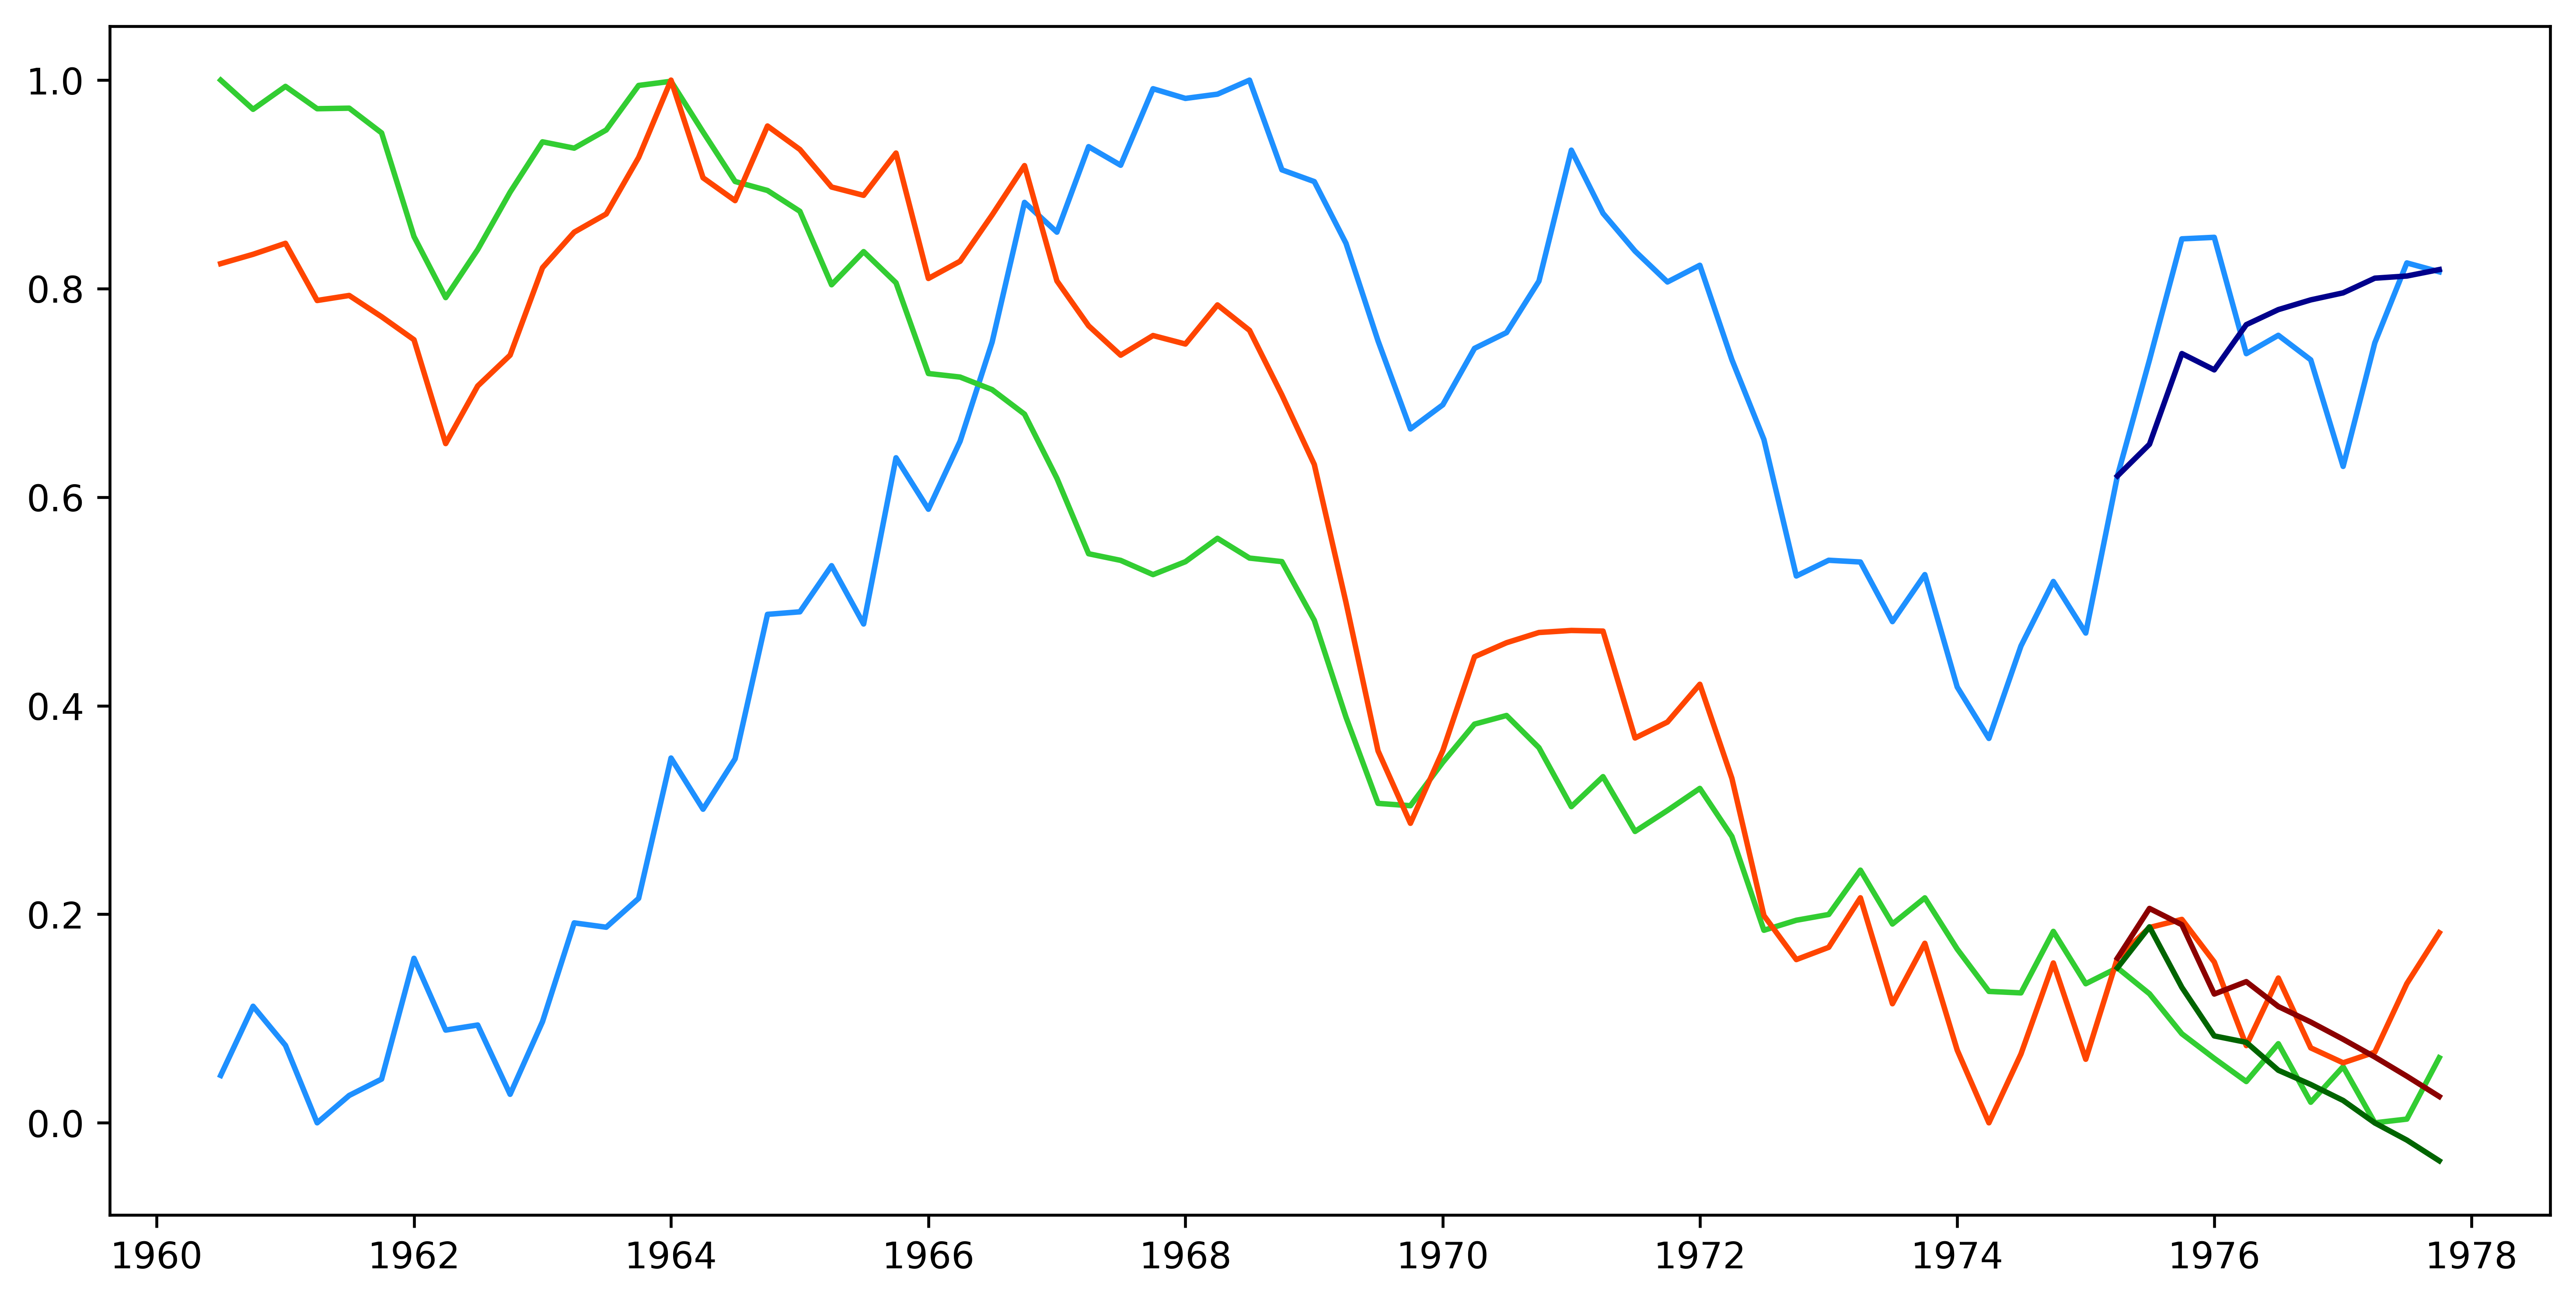

In [42]:
data_all.index=pd.date_range('1960/7/1', periods=70, freq='3MS')
plt.figure(figsize=(12,6),dpi=600)
plt.plot(data_all['lnDate1'],'dodgerblue',data_all['lnDate2'],'limegreen',data_all['lnDate3'],'orangered')
plt.plot(pred_2_real['lnDate1'],'darkblue',pred_2_real['lnDate2'],'darkgreen',pred_2_real['lnDate3'],'darkred')
plt.show()

In [43]:
error_new_1=pow(data_actual['lnDate1']-pred_2_real['lnDate1'],2)
MSE1_new=error_new_1.sum()/len(pred_2_real['lnDate1'])
error_new_2=pow(data_actual['lnDate2']-pred_2_real['lnDate2'],2)
MSE2_new=error_new_2.sum()/len(pred_2_real['lnDate2'])
error_new_3=pow(data_actual['lnDate3']-pred_2_real['lnDate3'],2)
MSE3_new=error_new_3.sum()/len(pred_2_real['lnDate3'])
print(MSE1_new,MSE2_new,MSE3_new)

0.006471216151746202 0.0018308666424864631 0.003593210124286139
